In [10]:
import pandas as pd
import numpy as np
from math import floor

import matplotlib.pyplot as plt

from sklearn import svm

# Preparing data

In [11]:
np.random.seed(42)

In [12]:
df = pd.read_csv('web-page-phishing.csv')

xdf = df[df.columns[:-1]]
ydf = df[df.columns[-1]]

ydf = ydf.replace(0, -1)

X = xdf.to_numpy()
Y = ydf.to_numpy()

# Custom Train Test Split

In [13]:
def train_test_split(x, y, test_size):
    # generate random order for spliting
    order = np.arange(x.shape[0])
    np.random.shuffle(order)

    # calculate size that needed for test
    num_test_size = floor(x.shape[0] * test_size) 
    
    # assign data to each array by random order
    x_test = x[order[:num_test_size], :x.shape[1]]
    x_train = x[order[num_test_size:], :x.shape[1]]

    y_test = y[order[:num_test_size]]
    y_train = y[order[num_test_size:]]

    return x_train, x_test, y_train, y_test

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Model based line

In [15]:
#based line
model = svm.SVC()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8668498626030477

# Custom SVM classifier

### using SVM in empirical risk minimization term and use subgradient to minimize the loss

In [68]:
class SVM:
    def __init__(self, d, lamda = 0, slack = 0, learning_rate = 0.001, num_epochs = 1000):
        self.w = np.zeros(d)
        self.b = 0
        self.lamda = lamda
        self.slack = slack
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.losses = []
        self.train_accuracy = []

    def fit(self, x_train, y_train):
        for epoch in range(self.num_epochs):
            # Compute predictions and hinge loss
            y_preds = np.dot(x_train, self.w) + self.b

            hinge_losses = np.maximum(0, 1 - (y_preds * y_train) - self.slack)

            # Compute total loss and average loss
            loss = np.sum(hinge_losses)
            avg_loss = (loss / len(x_train)) + (self.lamda * np.dot(self.w, self.w))

            # Store the average loss in the list
            self.losses.append(avg_loss)
            self.train_accuracy.append(self.score(x_train, y_train))

            print('Epoch:', epoch+1, 'Loss:', avg_loss)

            # Update subgradient
            mask = (hinge_losses > 0)
            gradient_w = -np.dot(mask * y_train, x_train) / len(x_train) + self.lamda * self.w
            gradient_b = -np.sum(mask * y_train) / len(x_train)

            self.w -= self.learning_rate * gradient_w
            self.b -= self.learning_rate * gradient_b
            
        self.__plot_loss()

    def __plot_loss(self):
        plt.plot(self.losses, label='Training Loss')
        plt.plot(self.train_accuracy, label='Training Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Metrics')
        plt.title('Training Result')
        plt.legend()
        plt.show()

    def predict(self, x_test):
        return np.sign(np.dot(x_test, self.w) + self.b)

    def score(self, x_test, y_test):
        y_pred = self.predict(x_test)
        test_accuracy = np.mean(y_pred == y_test)
        return(test_accuracy)
        
    

# Train data with custom SVM

Epoch: 1 Loss: 0.7999999999999999
Epoch: 2 Loss: 0.764436181004183
Epoch: 3 Loss: 0.7614639053010503
Epoch: 4 Loss: 0.7606147852948918
Epoch: 5 Loss: 0.7597704576449958
Epoch: 6 Loss: 0.7589276647280142
Epoch: 7 Loss: 0.7580867716635717
Epoch: 8 Loss: 0.7572472179394549
Epoch: 9 Loss: 0.7564085195400094
Epoch: 10 Loss: 0.7555707783942098
Epoch: 11 Loss: 0.7547342038183802
Epoch: 12 Loss: 0.7538986122651584
Epoch: 13 Loss: 0.7530643435965116
Epoch: 14 Loss: 0.752231339611583
Epoch: 15 Loss: 0.7513996595687545
Epoch: 16 Loss: 0.7505693519227965
Epoch: 17 Loss: 0.7497400355626097
Epoch: 18 Loss: 0.7489125123979473
Epoch: 19 Loss: 0.7480864040953789
Epoch: 20 Loss: 0.7472600812268897
Epoch: 21 Loss: 0.74643581986319
Epoch: 22 Loss: 0.7456126075111491
Epoch: 23 Loss: 0.7447902052922678
Epoch: 24 Loss: 0.7439692510695056
Epoch: 25 Loss: 0.7431492579204227
Epoch: 26 Loss: 0.7423304881361091
Epoch: 27 Loss: 0.741513428886226
Epoch: 28 Loss: 0.7406974385176799
Epoch: 29 Loss: 0.7398825336877503

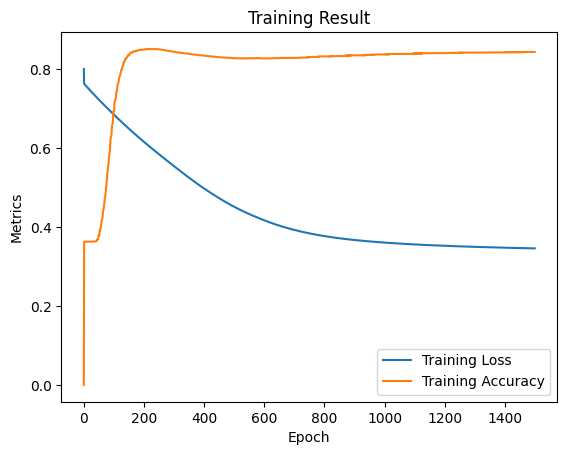

In [69]:
d = x_train.shape[1]
model = SVM(d, lamda=0.1, slack=0.2, learning_rate=0.001, num_epochs=1500)
model.fit(x_train, y_train)

# Performance

In [70]:
print('Training accuracy', model.score(x_train, y_train))
print('Testing accuracy', model.score(x_test, y_test))

Training accuracy 0.8431090904548975
Testing accuracy 0.8425680739445416
